In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [22]:
x = pd.read_csv('./features_reduced_imputed.csv')
x.drop(['Unnamed: 0'], axis = 1, inplace = True)
x.shape

(1700, 92)

In [23]:
y = pd.read_csv('./target.csv')
y = y['LET_IS']

# Convert Z-Score

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x.columns

Index(['AGE', 'SEX', 'INF_ANAM', 'IBS_POST', 'SIM_GIPERT', 'ZSN_A', 'nr_11',
       'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04',
       'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
       'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04',
       'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'SVT_POST', 'GT_POST',
       'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P',
       'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_08', 'n_r_ecg_p_01',
       'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05',
       'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
       'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05',
       'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09',
       'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
       'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06',
       'fibr_ter_07', 'fibr_ter_08', 'GIPER_NA', 'NA_

In [25]:
li = ['AGE', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE']

for column in li: 
    series = x[column]
    array = series.values
    array_reshaped = array.reshape(-1, 1)
    scaler = StandardScaler()
    normalized_array = scaler.fit_transform(array_reshaped)
    normalized_array_1d = normalized_array.flatten()
    x[column] = normalized_array_1d

In [27]:
x['NA_BLOOD'] #혈청 나트륨 함량

0       0.235547
1      -0.776577
2      -0.776577
3       1.585046
4      -0.776577
          ...   
1695   -1.113952
1696   -0.000615
1697   -0.304252
1698   -0.101828
1699    0.134335
Name: NA_BLOOD, Length: 1700, dtype: float64

# RandomForest Feature Importance (OOB Score O)

In [28]:
model = RandomForestClassifier(oob_score=True, random_state=42)
model.fit(x, y)

RandomForestClassifier(oob_score=True, random_state=42)

In [37]:
res = pd.Series(model.feature_importances_, index=x.columns)
# 내림차순 정렬을 이용한다
print(sum(res))
res = res.sort_values(ascending=False)[:15]

1.0000000000000002


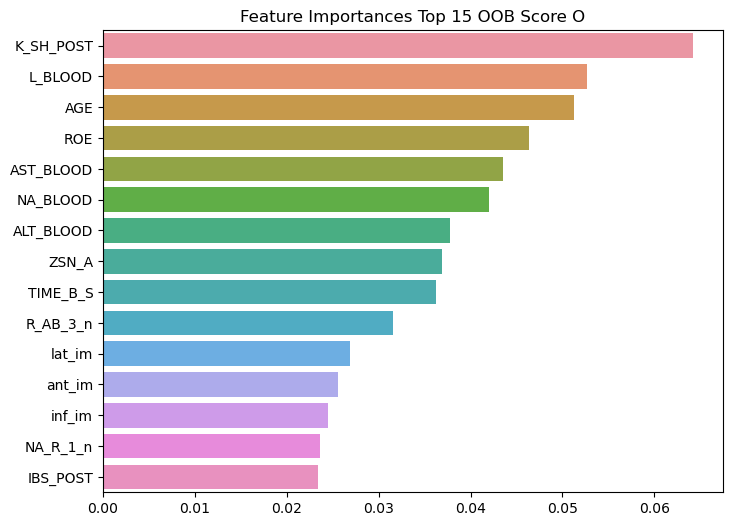

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15 OOB Score O')
sns.barplot(x=res, y=res.index)
plt.show()

# RandomForest Feature Importance (OOB Score X)

In [32]:
model1 = RandomForestClassifier()
model1.fit(x, y)

RandomForestClassifier()

In [33]:
ser1 = pd.Series(model1.feature_importances_, index=x.columns)
# 내림차순 정렬을 이용한다
res1 = ser1.sort_values(ascending=False)[:15]
print(sum(ser1))

1.0


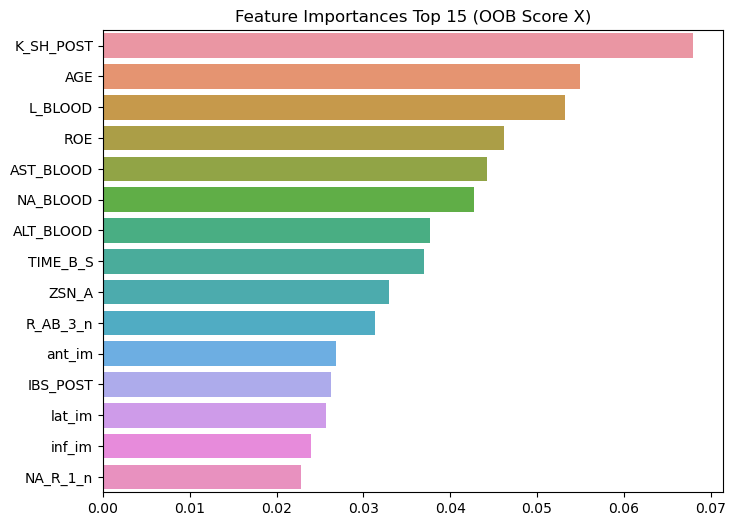

In [34]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15 (OOB Score X)')
sns.barplot(x=res1, y=res1.index)
plt.show()

In [44]:
res1 = ser1.sort_values(ascending=False)
t = 0.9 #Threshold
prefix_sum = 0
for i in range(len(res1)):
    prefix_sum += res1[i]
    if(prefix_sum >= t):
        break
    
print(i)

41


In [49]:
unique_values = {}
unique_values_counts = {}

for column in x.columns:
        unique_values = x[column].value_counts().to_dict()
        unique_values_counts[column] = unique_values
unique_values_counts

{'AGE': {0.10125707592359498: 90,
  0.27923167173636426: 81,
  0.012269778017210343: 79,
  0.1902443738299796: 68,
  0.7241681612682874: 66,
  -0.877603201046636: 57,
  -0.0767175198891743: 54,
  -0.43266671151471287: 54,
  0.3682189696427489: 54,
  -0.6106413073274821: 53,
  0.4572062675491335: 50,
  -0.16570481779555893: 50,
  -0.5216540094210975: 44,
  -0.25469211570194356: 42,
  -0.7886159031402514: 41,
  -0.6996286052338667: 40,
  0.5461935654555182: 39,
  1.1691046508002105: 39,
  -1.0555777968594053: 38,
  0.6351808633619028: 37,
  1.2580919487065954: 36,
  1.080117352893826: 34,
  0.8131554591746721: 34,
  0.9021427570810567: 34,
  0.9911300549874413: 32,
  -0.9665904989530206: 32,
  -0.3436794136083282: 30,
  1.34707924661298: 30,
  -1.14456509476579: 27,
  1.4360665445193646: 26,
  -1.6784888822040978: 26,
  -1.5895015842977132: 23,
  1.6140411403321338: 22,
  -1.7674761801104824: 19,
  -1.5005142863913286: 19,
  1.5250538424257492: 18,
  1.8810030340512878: 16,
  -1.41152698

In [53]:
df = pd.read_csv('./feature.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

unique_values = {}
unique_values_counts = {}

for column in df.columns:
        unique_values = df[column].value_counts().to_dict()
        unique_values_counts[column] = unique_values
unique_values_counts

{'AGE': {63.0: 90,
  65.0: 81,
  62.0: 79,
  64.0: 68,
  70.0: 66,
  52.0: 57,
  66.0: 54,
  61.0: 54,
  57.0: 53,
  55.0: 53,
  60.0: 50,
  67.0: 50,
  56.0: 44,
  59.0: 42,
  53.0: 41,
  54.0: 40,
  75.0: 39,
  68.0: 39,
  50.0: 38,
  69.0: 37,
  76.0: 36,
  72.0: 34,
  71.0: 34,
  74.0: 34,
  51.0: 32,
  73.0: 32,
  58.0: 30,
  77.0: 30,
  49.0: 27,
  78.0: 26,
  43.0: 26,
  44.0: 23,
  80.0: 22,
  45.0: 19,
  42.0: 19,
  79.0: 18,
  83.0: 16,
  46.0: 14,
  37.0: 14,
  82.0: 13,
  38.0: 13,
  47.0: 12,
  81.0: 12,
  41.0: 10,
  48.0: 9,
  40.0: 7,
  84.0: 7,
  34.0: 6,
  39.0: 5,
  88.0: 5,
  35.0: 5,
  85.0: 5,
  87.0: 4,
  32.0: 3,
  33.0: 3,
  86.0: 2,
  27.0: 2,
  36.0: 2,
  92.0: 2,
  90.0: 2,
  30.0: 1,
  26.0: 1},
 'SEX': {1: 1065, 0: 635},
 'INF_ANAM': {0.0: 1060, 1.0: 410, 2.0: 147, 3.0: 79},
 'STENOK_AN': {0.0: 661,
  6.0: 332,
  1.0: 146,
  2.0: 137,
  5.0: 125,
  3.0: 117,
  4.0: 76},
 'FK_STENOK': {2.0: 854, 0.0: 661, 3.0: 54, 1.0: 47, 4.0: 11},
 'IBS_POST': {2.0: 683, 